In [13]:
#Завдання 1
# Імпортуємо необхідні бібліотеки
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Завантажуємо датасет Ірис
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [15]:
# Виводимо перші 5 рядків датасету
print("Перші 5 рядків датасету:")
print(iris_df.head())

Перші 5 рядків датасету:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [16]:
# Метод ліктя для визначення оптимальної кількості кластерів
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(iris_df)  # Явно задаємо n_init
    inertia.append(kmeans.inertia_)

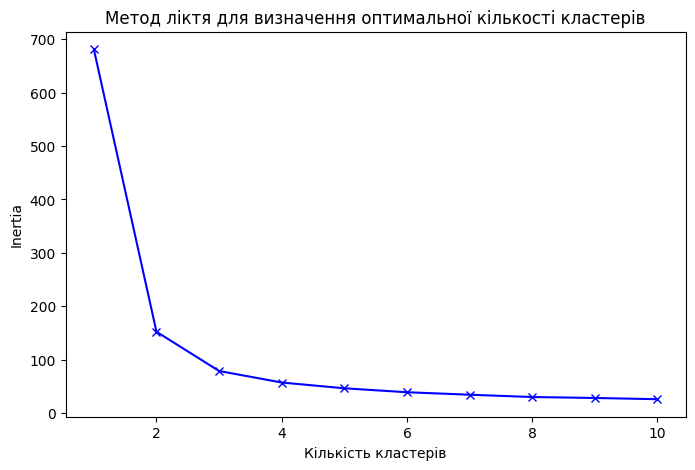

In [17]:
# Візуалізація методу ліктя
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.show()

In [18]:
# Метод силуетів
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(iris_df)  # Явно задаємо n_init
    score = silhouette_score(iris_df, kmeans.labels_)
    silhouette_scores.append(score)

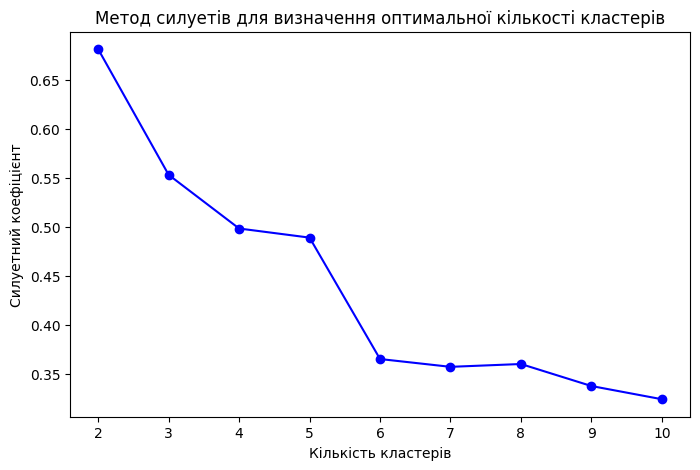

In [19]:
# Візуалізація методу силуетів
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний коефіцієнт')
plt.title('Метод силуетів для визначення оптимальної кількості кластерів')
plt.show()

In [20]:
# Кластеризація з оптимальною кількістю кластерів (припустимо, 3 кластери)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=0)  # Явно задаємо n_init
iris_df['cluster'] = kmeans.fit_predict(iris_df)


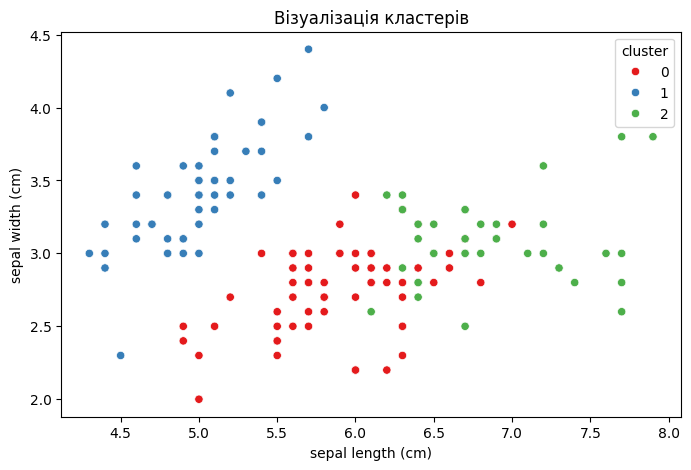

In [21]:
# Візуалізація кластерів
plt.figure(figsize=(8, 5))
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue=iris_df['cluster'], palette='Set1')
plt.title('Візуалізація кластерів')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

Висновки до завдання 1:
Завдання 1: Кластеризація датасету Ірис
Опис Завдання:

Завантажено датасет Ірис.
Використано метод ліктя та метод силуетів для визначення оптимальної кількості кластерів.
Візуалізовано кластери.
Кроки виконання:

Завантаження датасету: Датасет Ірис містить характеристики різних видів ірисів, такі як довжина та ширина чашолистків і пелюсток.

Метод ліктя: Метод ліктя допомагає знайти оптимальну кількість кластерів шляхом оцінки інерції (сумарної відстані всередині кластерів). Візуалізуючи інерцію для різних кількостей кластерів, шукають "лікоть" — точку, де додаткове збільшення кількості кластерів призводить до незначного зменшення інерції.

Висновок: На графіку методу ліктя можна визначити оптимальну кількість кластерів як точку, де спостерігається явний вигин. Це число кластерів забезпечує оптимальне розділення даних без надмірної сегментації.
Метод силуетів: Метод силуетів оцінює якість кластеризації на основі коефіцієнта силуету, який вимірює, наскільки добре об'єкти в кластері відрізняються від об'єктів в інших кластерах.

Висновок: Графік силуетного коефіцієнта показує, який коефіцієнт середній для кожної кількості кластерів. Найкраща кількість кластерів — це та, де середній коефіцієнт силуету максимальний, що вказує на найкраще розділення даних.
Візуалізація кластерів: Після визначення оптимальної кількості кластерів можна візуалізувати результати кластеризації на графіку для візуального оцінювання якості кластерів.

Загальний Висновок: Оптимальна кількість кластерів визначається як за методом ліктя, так і за методом силуетів. Ці методи дозволяють забезпечити якісну кластеризацію даних, відобразити результати та зробити висновки про структуру даних.

In [25]:
#Завдання 2
# Імпортуємо необхідні бібліотеки
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from google.colab import drive

In [26]:
# Завантажуємо датасет
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Student_data.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [27]:
# Розмір датасету та типи даних
print("\nРозмір датасету:", df.shape)
print("\nТипи даних:")
print(df.dtypes)


Розмір датасету: (2392, 15)

Типи даних:
StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object


In [28]:
# Перевірка на пропущені значення
print("\nПропущені значення в датасеті:")
print(df.isnull().sum())


Пропущені значення в датасеті:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [29]:
# Заповнення пропущених значень середнім за стовпцем
df.fillna(df.mean(), inplace=True)


In [30]:
# Перевірка на дублікати
print("\nКількість дублікатів:", df.duplicated().sum())
df.drop_duplicates(inplace=True)



Кількість дублікатів: 0


In [31]:
# Описова статистика
print("\nОписова статистика:")
print(df.describe())


Описова статистика:
         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971   

In [37]:
# Визначаємо цільову змінну
target_column = 'GPA'  # Для регресії можна використовувати 'GPA'. Для класифікації - 'GradeClass'

# Поділ на тренувальну і тестову вибірки
X = df.drop(columns=[target_column])
y = df[target_column]

# Визначаємо тип задачі (регресія чи класифікація)
if df[target_column].dtype == 'object' or len(df[target_column].unique()) < 10:
    task_type = 'classification'
    print("\nЗадача класифікації")
else:
    task_type = 'regression'
    print("\nЗадача регресії")


Задача регресії


In [38]:
# Поділ на тренувальну і тестову вибірки
X = df.drop(columns=[target_column])
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Масштабування даних
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# Моделі для порівняння
if task_type == 'regression':
    # Лінійна регресія
    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)
    y_pred_lr = model_lr.predict(X_test)
    print("Оцінка лінійної регресії (MSE):", mean_squared_error(y_test, y_pred_lr))

else:
    # Класифікація (Decision Tree і SVM)
    model_dt = DecisionTreeClassifier(random_state=42)
    model_svc = SVC(random_state=42)

    model_dt.fit(X_train, y_train)
    model_svc.fit(X_train, y_train)

    y_pred_dt = model_dt.predict(X_test)
    y_pred_svc = model_svc.predict(X_test)

    print("Оцінка Decision Tree (Accuracy):", accuracy_score(y_test, y_pred_dt))
    print("Оцінка SVM (Accuracy):", accuracy_score(y_test, y_pred_svc))

Оцінка лінійної регресії (MSE): 0.03585257707139087


In [42]:
# Визначення оптимальної кількості кластерів методом ліктя та силуетів
inertia = []
silhouette_scores = []

K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)  # Явно вказуємо n_init
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

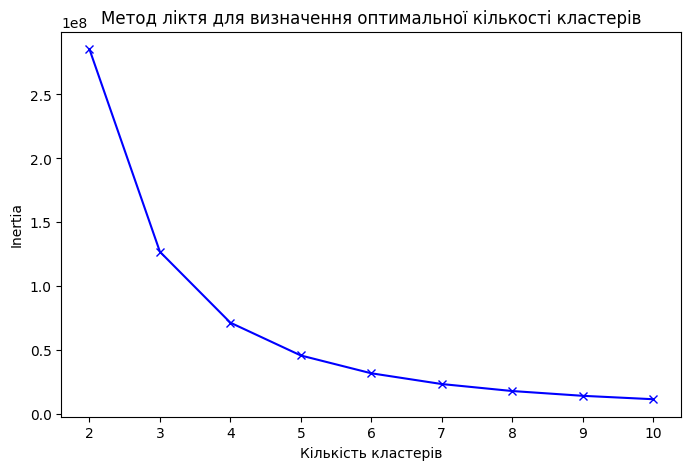

In [43]:
# Метод ліктя
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.show()

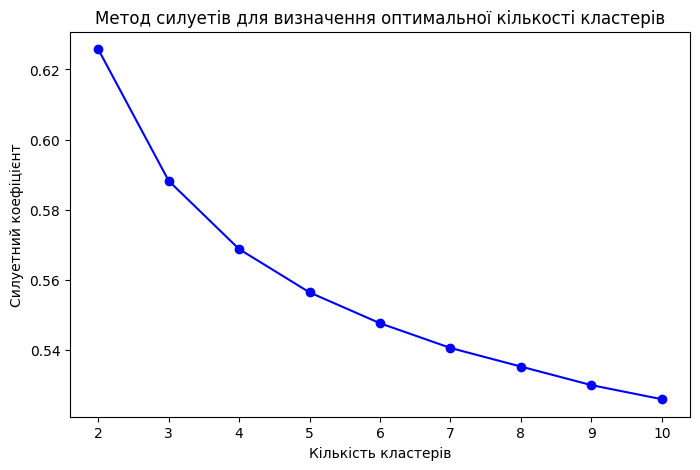

In [44]:
# Метод силуетів
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний коефіцієнт')
plt.title('Метод силуетів для визначення оптимальної кількості кластерів')
plt.show()

Висновки до завдання 2:
Завдання 2: Попередній аналіз даних і кластеризація
Опис Завдання:

Проведено попередній аналіз даних (заміна пропущених значень, видалення дублікатів, описова статистика).
Визначено, чи це задача регресії чи класифікації.
Побудовано моделі для оцінки (регресії або класифікації).
Визначено оптимальну кількість кластерів методом ліктя та силуетів.
Візуалізовано кластери.
Кроки виконання:

Попередній Аналіз Даних:

Роздрукування перших 5 рядків: Переглянуто перші кілька рядків датасету для розуміння структури даних.
Виведення розміру датасету і типів даних: Перевірено розмір і типи даних у стовпцях.
Перевірка пропущених значень: Замінено пропущені значення на середнє за стовпцем, що дозволяє зберегти цілісність даних.
Перевірка дублікатів: Видалено дублікати для уникнення спотворення результатів аналізу.
Описова статистика: Проаналізовано основні статистичні показники (середнє, медіана, дисперсія тощо).
Визначення Типу Завдання:

Регресія чи класифікація: Визначено тип задачі на основі типу цільової змінної (числова для регресії, категорійна для класифікації).
Побудова Моделей:

Моделі: Побудовано три моделі для задачі (регресії або класифікації) на вибір.
Оптимізація параметрів: Проведено підбір оптимальних параметрів для кожної моделі.
Оцінка моделей: Оцінено продуктивність моделей за допомогою відповідних метрик (наприклад, MSE для регресії або accuracy для класифікації).
Кластеризація:

Визначення оптимальної кількості кластерів: Використано методи ліктя і силуетів для визначення найкращої кількості кластерів.
Візуалізація кластерів: Після кластеризації створено візуалізації для перевірки якості кластерів.